## Final Project Submission

Please fill out:
* Student name: Graham Wilson
* Student pace: full time
* Scheduled project review date/time: n/a 
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://gjwilson9.wordpress.com/2020/03/21/future-of-data-science-in-real-estate/


<br>

Provided is a real estate dataset of house sales in King County, Washington. The data provided is as follows:
* Price - Home sale price
* Date - Sale date
* Bedrooms - Number of bedrooms
* Bathrooms - Number of bathrooms
* SQFT Living - Squarefeet of house
* SQFT Lot - Lot size
* Floors - Number of floors
* Waterfront - Home location on or off waterfront
* View - Quality of view
* Condition - Home quality condition 
* Grade - Quality of building materials
* SQFT Above - Squarefeet of home above ground
* SQFT Basement - Squarefeet of home bsement
* Year Built
* Year Renovated
* Zipcode
* Latitude
* Longitude
* SQFT Living15 - The square footage of interior housing living space for the nearest 15 neighbors
* SQFT Lot15 - The square footage of the land lots of the nearest 15 neighbors
     
The goal of this project is to predict the price of future home sales using the provided data. Initally, the data must be cleaned prior to exploration, and modeling, where multivariate linear regression will be used to provide the most accurate predictive model as possible.  

Aside from predicting the price of future home sales in the area, it's important to ask a few questions to gain further insight into the King County real estate market. These questions are geared toward real estate investing for home price appreciation and rental income. As the questions are geared more toward investing, higher priced homes will not be as relevant in this dataset.

Questions:
- Is there an ideal location for investing? In terms of price per squarefoot, build quality, and home condition
- Is there an ideal month to purchase a home for investing? Cheaper months to buy an investment
- Does renovating a home increase the sale price?



<br>

## Obtain Data

In [1]:
#Import necessary libraries to perform initial cleaning of data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrub Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df['waterfront'].unique()

array([nan,  0.,  1.])

### Fill Null Values

#### Waterfront

In [6]:
df['waterfront'].value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

Over 99% of homes do not have waterfront, so fill null values with zeros

In [7]:
df['waterfront'] = df['waterfront'].fillna(value = 0)

#### Year Renovated

In [8]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

Over 96% of houses do not have renovations, it's safe to assume null values here indicate the home hasn't been renovated. Fill with zeros

In [9]:
df['yr_renovated'] = df['yr_renovated'].fillna(value = 0)

#### View

In [10]:
df['view'].value_counts(normalize=True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

The majority of views (90%) have a zero value, so it's safe to add zeros to null values. Most likely will not be using this data anyway.

In [11]:
df['view'] = df['view'].fillna(value = 0)

In [12]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Convert Data Types

#### Date

In [13]:
#convert date to date-time
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
df['date'].unique()

array(['2014-10-13T00:00:00.000000000', '2014-12-09T00:00:00.000000000',
       '2015-02-25T00:00:00.000000000', '2015-02-18T00:00:00.000000000',
       '2014-05-12T00:00:00.000000000', '2014-06-27T00:00:00.000000000',
       '2015-01-15T00:00:00.000000000', '2015-04-15T00:00:00.000000000',
       '2015-03-12T00:00:00.000000000', '2015-04-03T00:00:00.000000000',
       '2014-05-27T00:00:00.000000000', '2014-05-28T00:00:00.000000000',
       '2014-10-07T00:00:00.000000000', '2015-01-24T00:00:00.000000000',
       '2014-07-31T00:00:00.000000000', '2014-05-29T00:00:00.000000000',
       '2014-12-05T00:00:00.000000000', '2015-04-24T00:00:00.000000000',
       '2014-05-14T00:00:00.000000000', '2014-08-26T00:00:00.000000000',
       '2014-07-03T00:00:00.000000000', '2014-05-16T00:00:00.000000000',
       '2014-11-20T00:00:00.000000000', '2014-11-03T00:00:00.000000000',
       '2014-06-26T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2014-06-24T00:00:00.000000000', '2015-03-02

<br>
This dataset only contains houses that were sold in 2014 and 2015, so the year is unimportant. We're more interested in what month the houses were sold. Make a month sold column
<br>

In [15]:
#Create a month sold column
df['month'] = df['date'].dt.month

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


#### Squarefoot Basement

In [17]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

<br>
One basement value shows up as '?'. The majority of houses in the area do not have
basements. Replace this value with zero, then convert datatype to float

In [18]:
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value=0)

In [19]:
df['sqft_basement'] = df.sqft_basement.astype(float)

### Drop Duplicates

<br>
Drop any duplicated homes on 'id' to avoid multiple inputs and potential future
conflict in the modeling process

In [20]:
df.drop_duplicates(subset='id', inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
month            21420 non-null int64
dtypes: datetime64[ns](1), f

There were 177 duplicates dropped from the dataset

### Check for Extranous Values

In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,...,1791.170215,285.904342,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,6.590336
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,...,828.692965,440.008202,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867,3.107924
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,4.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,...,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


In [23]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64 


date 
 2014-06-23    0.006629
2014-06-26    0.006116
2014-06-25    0.006116
2014-07-08    0.005929
2015-04-27    0.005882
Name: date, dtype: float64 


price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
Name: price, dtype: float64 


bedrooms 
 3    0.454295
4    0.319748
2    0.127731
5    0.074043
6    0.012372
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249860
1.00    0.177124
1.75    0.140990
2.25    0.094818
2.00    0.089309
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006349
1440    0.006209
1400    0.006162
1660    0.005976
1800    0.005976
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016573
6000    0.013352
4000    0.011625
7200    0.010177
7500    0.005509
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492624
2.0    0.382960
1.

<br>
There is an outlier value in number of bedrooms of 33

In [24]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [25]:
df['bedrooms'].value_counts(normalize=True)

3     0.454295
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
11    0.000047
33    0.000047
Name: bedrooms, dtype: float64

In [26]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,6


<br>
This is clearly a typo as the house is only 1620 square feet. Replace this extraneous value with 3 bedrooms

In [27]:
df['bedrooms'] = df['bedrooms'].replace(to_replace=33, value=3)

### Create Price/Sqft column

In [28]:
df['price_sqft'] = df['price'] / df['sqft_living']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,price_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,303.571429


## Explore Data

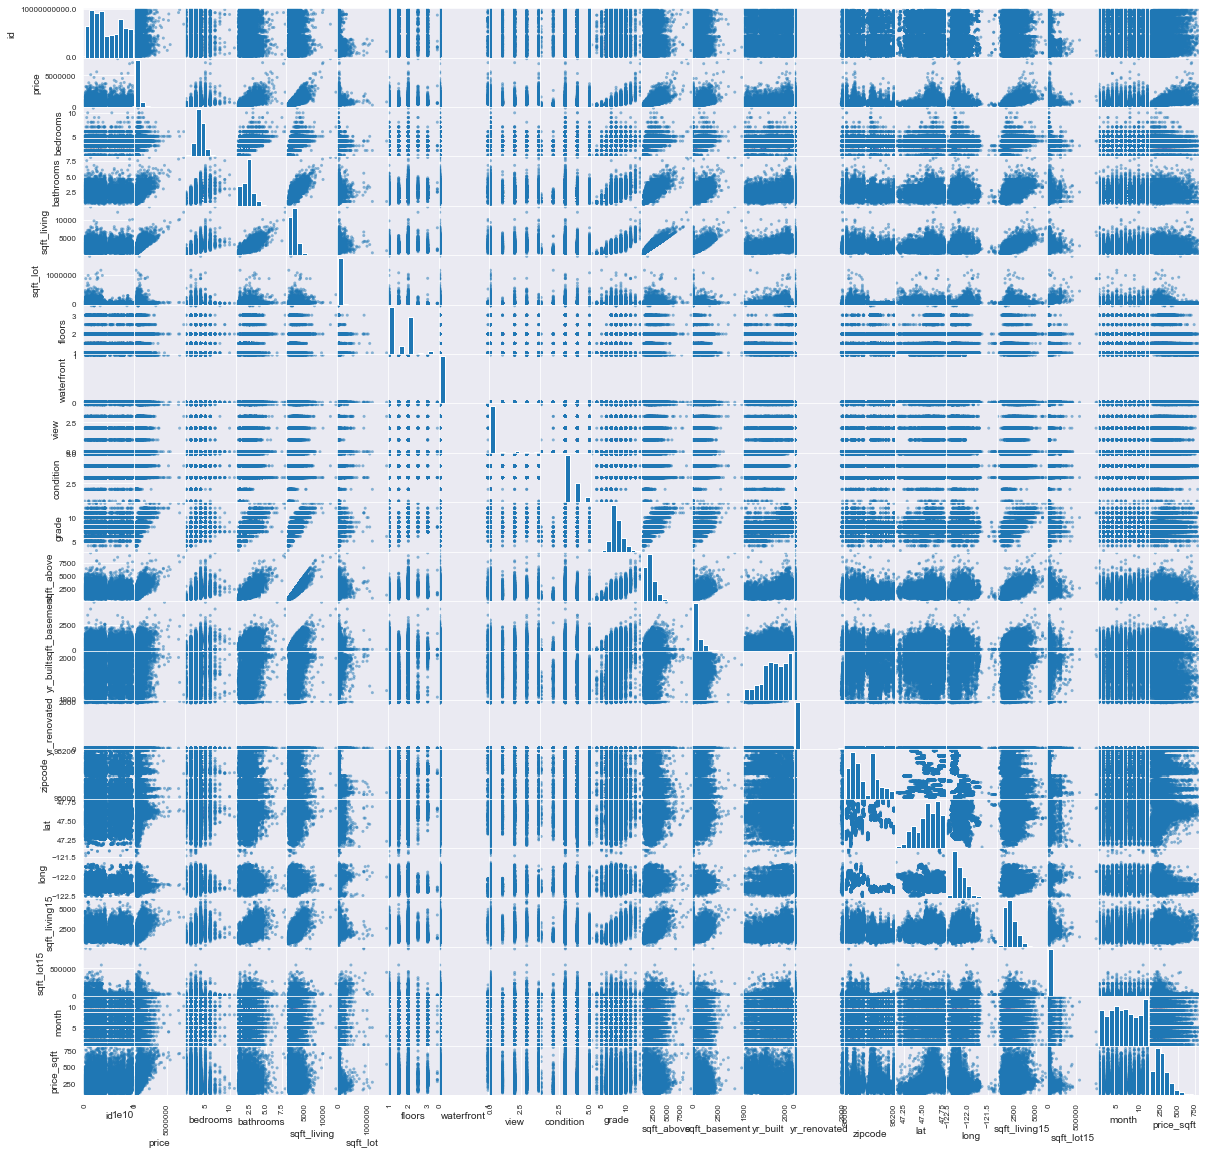

In [29]:
pd.plotting.scatter_matrix(df, figsize = [20, 20])
plt.show()

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,price_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,303.571429


In [31]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'price_sqft'],
      dtype='object')

### Correlation Check

In [32]:
#Create a list of continuous features and check for strong correlations
feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_sqft']
df[feats].corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft
sqft_living,1.000000,0.172586,0.876533,0.428026,0.316646,-0.198995,0.050739,0.240212,0.756186,0.183837,-0.090230
sqft_lot,0.172586,1.000000,0.183210,0.014859,0.052312,-0.129422,-0.085822,0.230265,0.143805,0.717743,-0.034661
sqft_above,0.876533,0.183210,1.000000,-0.051645,0.422977,-0.260803,-0.002040,0.344161,0.731887,0.194445,-0.086842
sqft_basement,0.428026,0.014859,-0.051645,1.000000,-0.131495,0.073678,0.108517,-0.143421,0.198197,0.015894,-0.022922
yr_built,0.316646,0.052312,0.422977,-0.131495,1.000000,-0.346162,-0.148857,0.409173,0.324715,0.070125,-0.289707
zipcode,-0.198995,-0.129422,-0.260803,0.073678,-0.346162,1.000000,0.266712,-0.564778,-0.278428,-0.147063,0.173128
lat,0.050739,-0.085822,-0.002040,0.108517,-0.148857,0.266712,1.000000,-0.136228,0.047485,-0.086223,0.473091
long,0.240212,0.230265,0.344161,-0.143421,0.409173,-0.564778,-0.136228,1.000000,0.334679,0.255420,-0.237078
sqft_living15,0.756186,0.143805,0.731887,0.198197,0.324715,-0.278428,0.047485,0.334679,1.000000,0.182765,0.039086
sqft_lot15,0.183837,0.717743,0.194445,0.015894,0.070125,-0.147063,-0.086223,0.255420,0.182765,1.000000,-0.058958


sqft_living correlates strongly with sqft_above and sqft_living15

sqft_lot correlates to sqft_lot15

Remove sqft_above, sqft_living15, and sqft_lot15 to remove multicollinearity

In [33]:
df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [34]:
feats = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'price_sqft']
df[feats].corr()

,sqft_living,sqft_lot,sqft_basement,yr_built,zipcode,lat,long,price_sqft
sqft_living,1.000000,0.172586,0.428026,0.316646,-0.198995,0.050739,0.240212,-0.090230
sqft_lot,0.172586,1.000000,0.014859,0.052312,-0.129422,-0.085822,0.230265,-0.034661
sqft_basement,0.428026,0.014859,1.000000,-0.131495,0.073678,0.108517,-0.143421,-0.022922
yr_built,0.316646,0.052312,-0.131495,1.000000,-0.346162,-0.148857,0.409173,-0.289707
zipcode,-0.198995,-0.129422,0.073678,-0.346162,1.000000,0.266712,-0.564778,0.173128
lat,0.050739,-0.085822,0.108517,-0.148857,0.266712,1.000000,-0.136228,0.473091
long,0.240212,0.230265,-0.143421,0.409173,-0.564778,-0.136228,1.000000,-0.237078
price_sqft,-0.090230,-0.034661,-0.022922,-0.289707,0.173128,0.473091,-0.237078,1.000000


### Determine Coninuous vs Categorical Variables

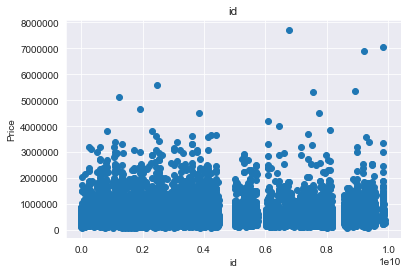

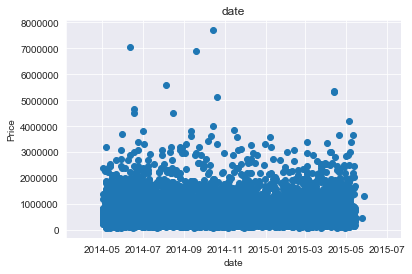

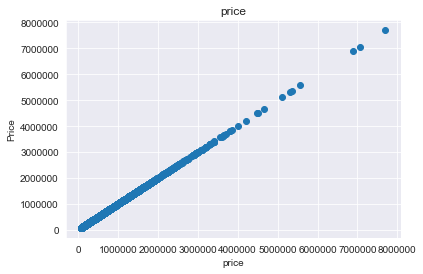

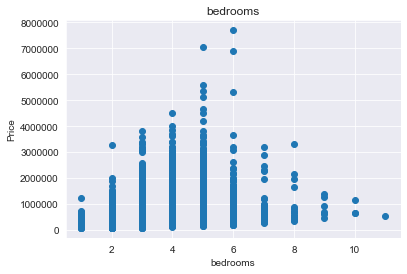

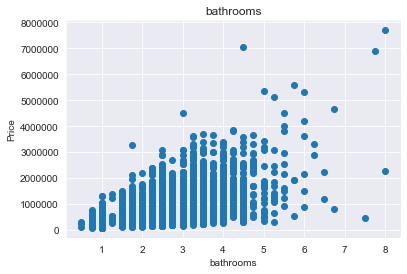

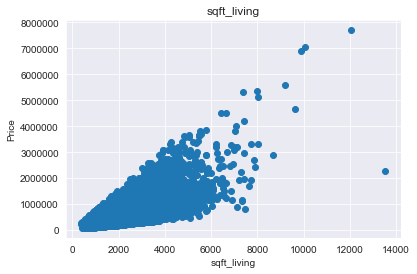

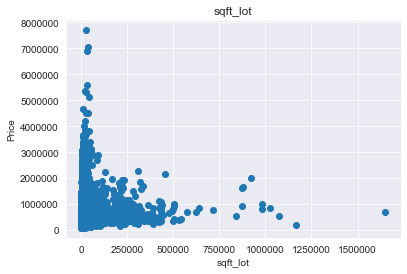

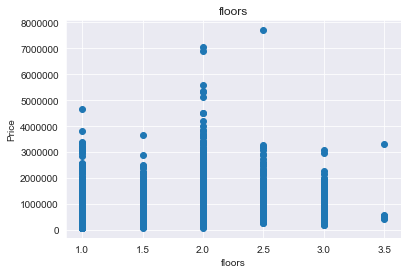

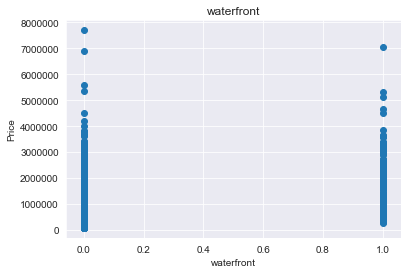

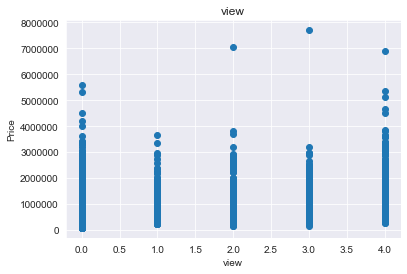

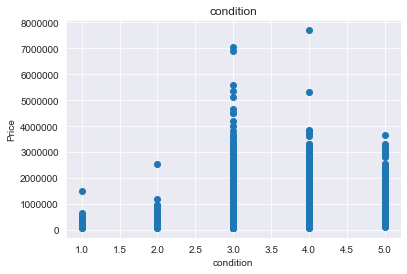

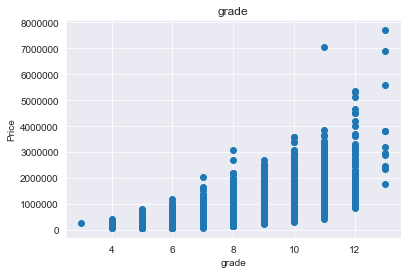

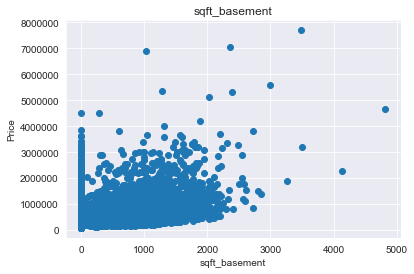

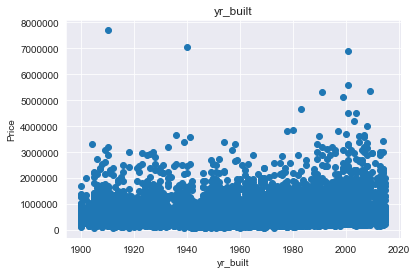

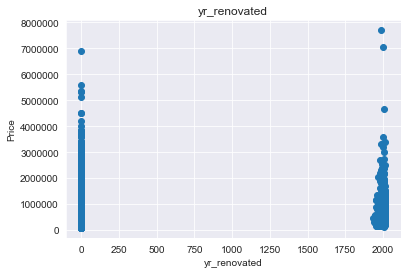

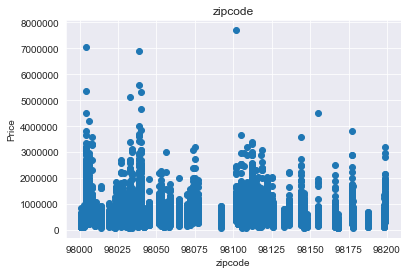

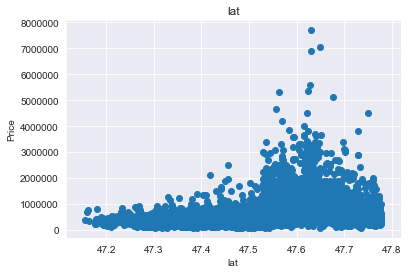

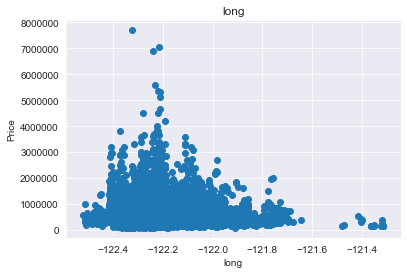

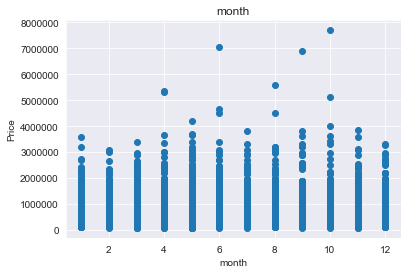

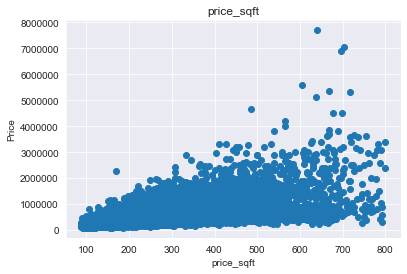

In [35]:
for col in df:
    plt.scatter(df[col], df['price'], label=col)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(col)
    plt.show()

After an initial look at the data:

Drop:
- 'id'
- 'date'
- 'view'
         
Dependent Variable:
- 'price'
         
Continuous Variables:
- 'bedrooms'
- 'sqft_living'
- 'sqft_lot'
- 'condition'
- 'grade'
- 'yr_built'
- 'price_sqft'

*As to not overdo categorical variables, keep bedrooms, condition, year built, and grade as continuous to see how they come out It's possible to convert them to categorical after the initial modeling has been done.*
    
Categorical Variables:
- 'bathrooms' - categorical due to correlation with sqft_living
- 'floors'
- 'waterfront'
- 'sqft_basement' - binary yes, or no basement
- 'yr_renovated' - binary yes, or no renovated
- 'zipcode'
- 'lat' - break into quadrants
- 'long' - break into quadrants
- 'month' - categorize into seasons

In [36]:
#drop unwanted columns
df.drop(['id', 'date', 'view'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month,price_sqft
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,10,188.050847
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,12,209.338521
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2,233.766234
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,12,308.163265
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,2,303.571429


### Explore Continuous Variables

In [37]:
cont_df = df.copy(deep=True)

In [38]:
cont_df.drop(['bathrooms', 'floors', 'waterfront', 'sqft_basement',  
            'yr_renovated', 'zipcode', 'lat', 'long', 'month'], inplace=True, axis=1)
cont_df.head()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built,price_sqft
0,221900.0,3,1180,5650,3,7,1955,188.050847
1,538000.0,3,2570,7242,3,7,1951,209.338521
2,180000.0,2,770,10000,3,6,1933,233.766234
3,604000.0,4,1960,5000,5,7,1965,308.163265
4,510000.0,3,1680,8080,3,8,1987,303.571429


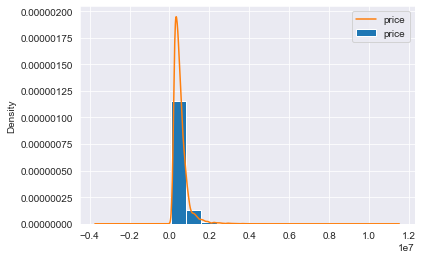

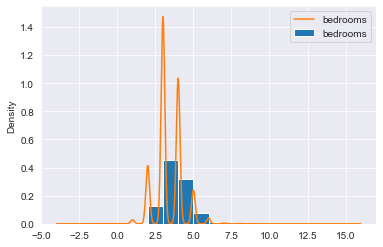

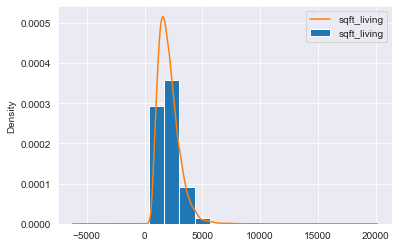

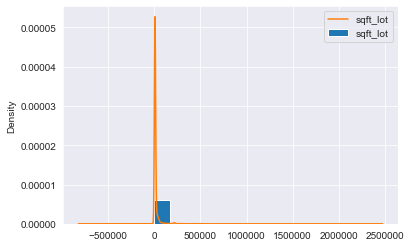

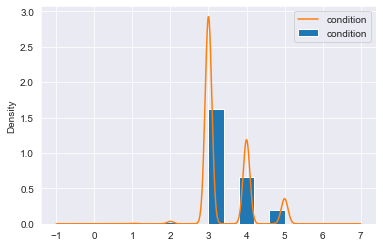

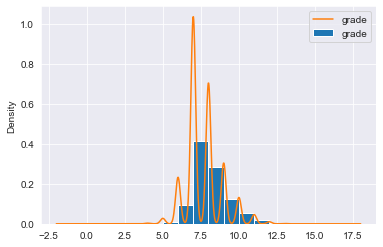

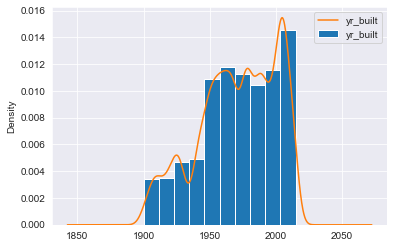

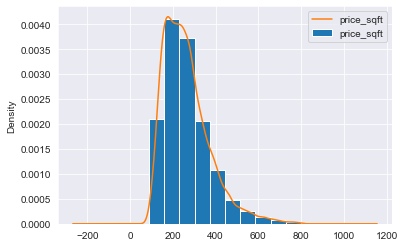

In [39]:
#view histograms and kde for each continuous variable
for col in cont_df:
    cont_df[col].plot.hist(density=True, label=col)
    cont_df[col].plot.kde(label =col)
    plt.legend()
    plt.show()

<br>
There seems to be quite a bit of skewness for most continuous variables. Grade and possibly bedrooms seem to have the only normally distributed histogram

<br>

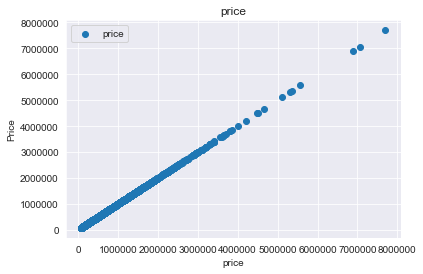

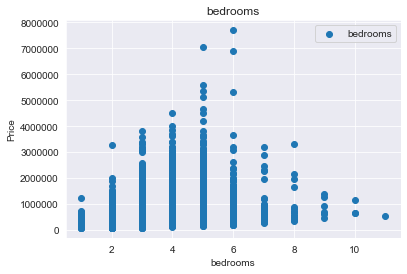

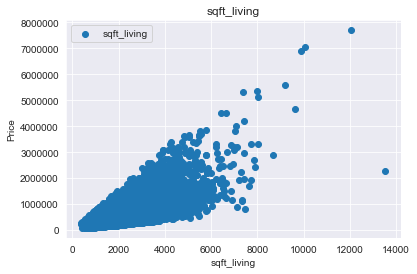

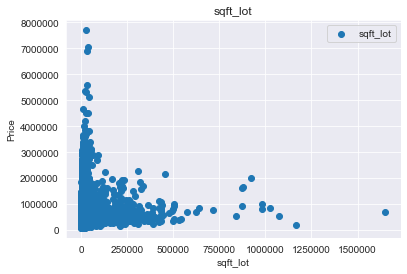

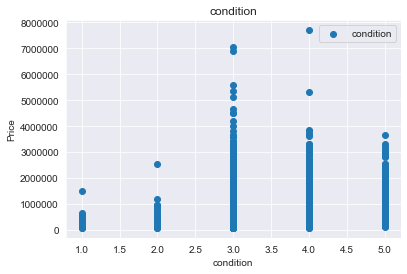

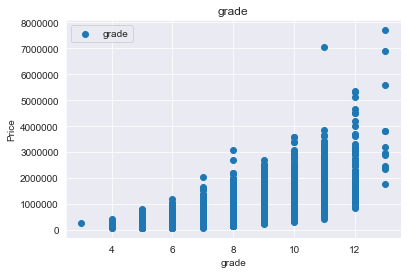

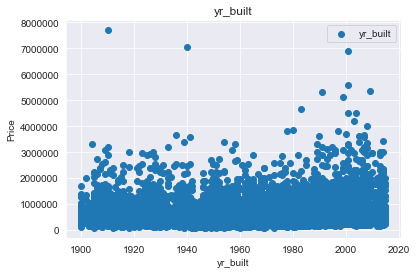

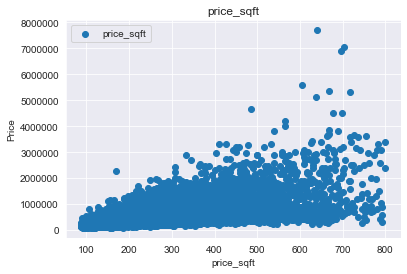

In [40]:
#visualise data as scatterplots
for col in cont_df:
    plt.scatter(cont_df[col], cont_df['price'], label = col)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(col)
    plt.legend()
    plt.show()

<br>
Sqft_living and grade, show a positive correlation with home price. Whereas sqft_lot and year built dont seem to have as much of a correlation. To try and clean the data of outliers in sqft_lot, remove homes priced above 2 million dollars, and sqft lots above 250000sqft. This may help with creating more linear correlations with price across all continuous variables. 
<br>

As this investigation isn't interested in investing in higher priced homes, it's probably safe to remove these outliers for now.

In [41]:
#remove sqft_lot outliers
trim_count1 = cont_df[cont_df['sqft_lot'] >= 250000]
len(trim_count1)

106

In [42]:
#remove homes above 2 million outliers
trim_count2 = cont_df[cont_df['price'] >= 2000000]
len(trim_count2)

208

In [43]:
cont_df.describe()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built,price_sqft
count,2.142000e+04,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.372549,2083.132633,1.512804e+04,3.410784,7.662792,1971.092997,263.952901
std,3.679311e+05,0.902995,918.808412,4.153080e+04,0.650035,1.171971,29.387141,109.885997
min,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,3.000000,1900.000000,87.588235
25%,3.225000e+05,3.000000,1430.000000,5.040000e+03,3.000000,7.000000,1952.000000,182.142857
50%,4.500000e+05,3.000000,1920.000000,7.614000e+03,3.000000,7.000000,1975.000000,244.525961
75%,6.450000e+05,4.000000,2550.000000,1.069050e+04,4.000000,8.000000,1997.000000,318.181818
max,7.700000e+06,11.000000,13540.000000,1.651359e+06,5.000000,13.000000,2015.000000,800.000000


In [44]:
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 8 columns):
price          21420 non-null float64
bedrooms       21420 non-null int64
sqft_living    21420 non-null int64
sqft_lot       21420 non-null int64
condition      21420 non-null int64
grade          21420 non-null int64
yr_built       21420 non-null int64
price_sqft     21420 non-null float64
dtypes: float64(2), int64(6)
memory usage: 1.5 MB


In [45]:
trim_df = cont_df[cont_df['sqft_lot'] <= 250000]
trim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21314 entries, 0 to 21596
Data columns (total 8 columns):
price          21314 non-null float64
bedrooms       21314 non-null int64
sqft_living    21314 non-null int64
sqft_lot       21314 non-null int64
condition      21314 non-null int64
grade          21314 non-null int64
yr_built       21314 non-null int64
price_sqft     21314 non-null float64
dtypes: float64(2), int64(6)
memory usage: 1.5 MB


Removing lots greater than 250000sqft removed 106 rows from the dataset.

<br>

In [46]:
trim_df.describe()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built,price_sqft
count,2.131400e+04,21314.000000,21314.000000,21314.000000,21314.000000,21314.000000,21314.000000,21314.000000
mean,5.397847e+05,3.372525,2078.761331,13056.891011,3.411138,7.659426,1971.039880,263.970404
std,3.674660e+05,0.902775,911.736164,24408.260095,0.650052,1.168222,29.392116,109.968064
min,7.800000e+04,1.000000,370.000000,520.000000,1.000000,3.000000,1900.000000,87.588235
25%,3.215000e+05,3.000000,1430.000000,5029.000000,3.000000,7.000000,1951.000000,182.059964
50%,4.500000e+05,3.000000,1910.000000,7588.500000,3.000000,7.000000,1975.000000,244.551371
75%,6.430015e+05,4.000000,2550.000000,10579.750000,4.000000,8.000000,1997.000000,318.318946
max,7.700000e+06,11.000000,12050.000000,249126.000000,5.000000,13.000000,2015.000000,800.000000


In [47]:
trim2_df = trim_df[trim_df['price'] <= 2000000]
trim2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21118 entries, 0 to 21596
Data columns (total 8 columns):
price          21118 non-null float64
bedrooms       21118 non-null int64
sqft_living    21118 non-null int64
sqft_lot       21118 non-null int64
condition      21118 non-null int64
grade          21118 non-null int64
yr_built       21118 non-null int64
price_sqft     21118 non-null float64
dtypes: float64(2), int64(6)
memory usage: 1.5 MB


Removing homes priced higher than 2 million dollars removed 196 rows from the dataset. After removing both outliers, the data still has over 21000 rows; plenty to work with for modeling

<br>

In [48]:
trim2_df.describe()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built,price_sqft
count,2.111800e+04,21118.000000,21118.000000,21118.000000,21118.000000,21118.000000,21118.000000,21118.000000
mean,5.189730e+05,3.363481,2051.550810,13000.733261,3.409982,7.631168,1971.038024,261.141477
std,2.873328e+05,0.897184,859.688122,24469.980216,0.648922,1.130709,29.329469,105.895247
min,7.800000e+04,1.000000,370.000000,520.000000,1.000000,3.000000,1900.000000,87.588235
25%,3.200000e+05,3.000000,1420.000000,5006.250000,3.000000,7.000000,1952.000000,181.451613
50%,4.500000e+05,3.000000,1900.000000,7560.000000,3.000000,7.000000,1975.000000,243.599984
75%,6.350000e+05,4.000000,2520.000000,10494.250000,4.000000,8.000000,1997.000000,315.573770
max,2.000000e+06,11.000000,7730.000000,249126.000000,5.000000,13.000000,2015.000000,792.682927


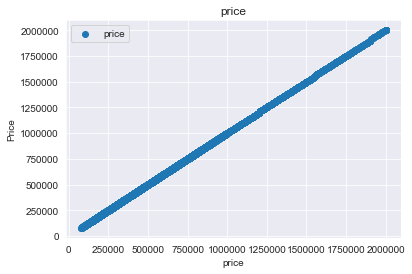

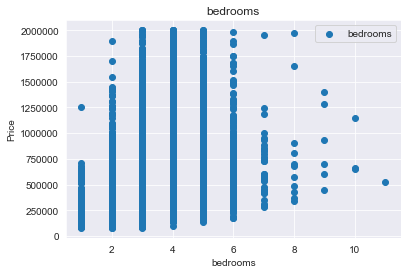

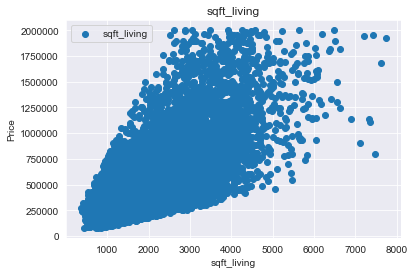

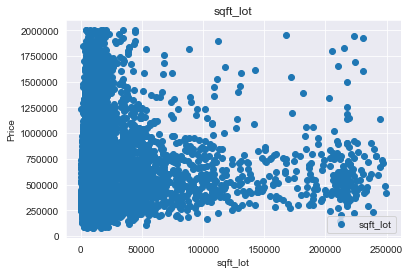

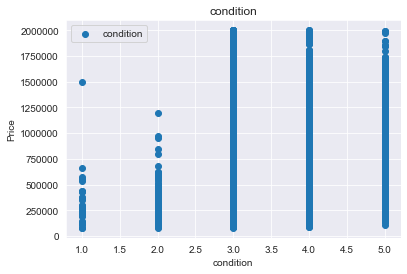

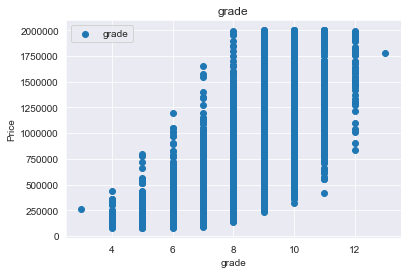

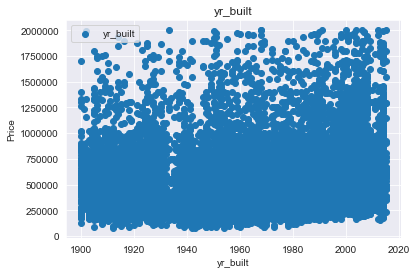

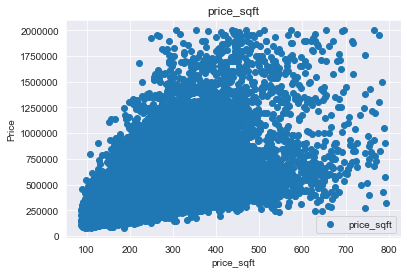

In [49]:
for col in trim2_df:
    plt.scatter(trim2_df[col], trim2_df['price'], label = col)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(col)
    plt.legend()
    plt.show()

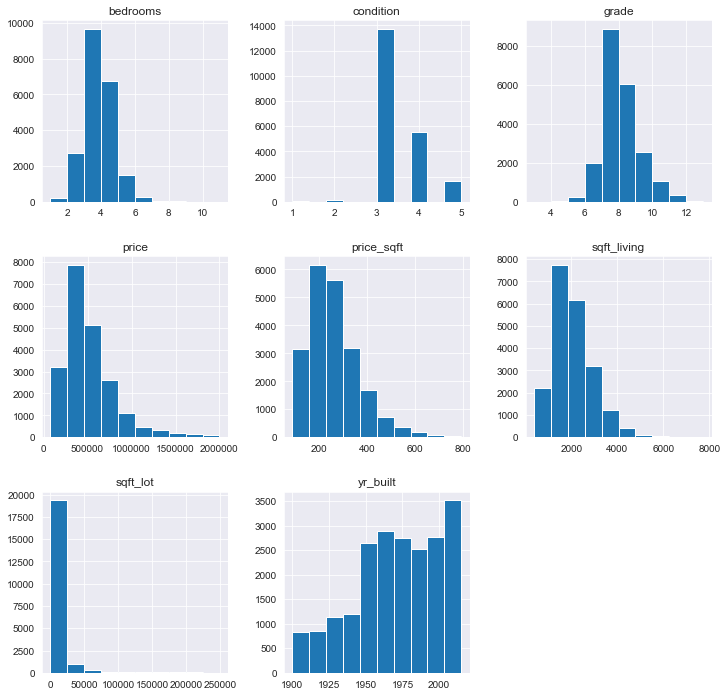

In [50]:
trim2_df.hist(figsize=(12, 12))
plt.show()

After timming the outliers out of the dataset, there's still a skewness to all of the continuous data that needs to be addressed to meet the normalization requirement for regression modeling.

<br>

#### Log Transformations

Perform log transformations on all of the continuous variables to see if it helps with skewness

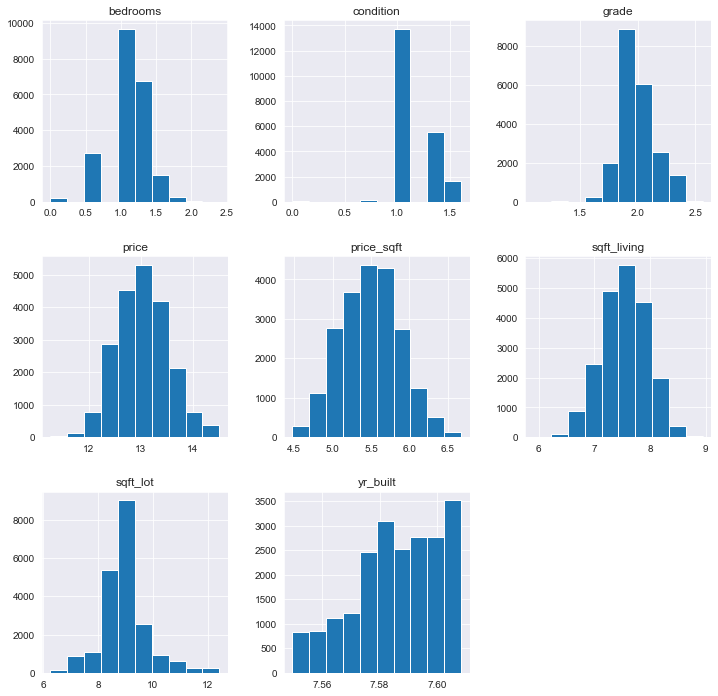

In [51]:
#Perform log transformations on all continuous variables
log_cont_df = trim2_df.copy(deep=True)

for col in log_cont_df:
    log_cont_df[col] = log_cont_df[col].map(lambda x: np.log(x))

log_cont_df.hist(figsize=(12,12))
plt.show()

Log transformations seem to help with bedroom, squarefoot living, and squarefoot lot, so we will keep those variables with log transformations in the model. We will exclude log transformations for price, condition, grade and year built from our data to be modeled.

In [52]:
log_cont_df.head()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built,price_sqft
0,12.309982,1.098612,7.073270,8.639411,1.098612,1.945910,7.578145,5.236712
1,13.195614,1.098612,7.851661,8.887653,1.098612,1.945910,7.576097,5.343953
2,12.100712,0.693147,6.646391,9.210340,1.098612,1.791759,7.566828,5.454322
3,13.311329,1.386294,7.580700,8.517193,1.609438,1.945910,7.583248,5.730630
4,13.142166,1.098612,7.426549,8.997147,1.098612,2.079442,7.594381,5.715617


In [53]:
#rename colunms to avoid confusion
log_cont_df.rename(columns = {'price' : 'log_price', 'bedrooms' : 'log_bedrooms',
                                'sqft_living' : 'log_sqft_living',
                                'sqft_lot' : 'log_sqft_lot', 'condition' : 'log_condition',
                                'grade' : 'log_grade', 'yr_built' : 'log_yr_built',
                                'price_sqft': 'log_price_sqft'}, inplace=True)
log_cont_df.head()

,log_price,log_bedrooms,log_sqft_living,log_sqft_lot,log_condition,log_grade,log_yr_built,log_price_sqft
0,12.309982,1.098612,7.073270,8.639411,1.098612,1.945910,7.578145,5.236712
1,13.195614,1.098612,7.851661,8.887653,1.098612,1.945910,7.576097,5.343953
2,12.100712,0.693147,6.646391,9.210340,1.098612,1.791759,7.566828,5.454322
3,13.311329,1.386294,7.580700,8.517193,1.609438,1.945910,7.583248,5.730630
4,13.142166,1.098612,7.426549,8.997147,1.098612,2.079442,7.594381,5.715617


In [54]:
#create a new dataframe with log transformations on certain cont variables
cont_cleaned_df = trim2_df.copy(deep=True)

In [55]:
cont_cleaned_df['log_bedrooms'] = log_cont_df['log_bedrooms']


In [56]:
cont_cleaned_df['log_sqft_living'] = log_cont_df['log_sqft_living']

In [57]:
cont_cleaned_df['log_sqft_lot'] = log_cont_df['log_sqft_lot']

In [58]:
cont_cleaned_df.head()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built,price_sqft,log_bedrooms,log_sqft_living,log_sqft_lot
0,221900.0,3,1180,5650,3,7,1955,188.050847,1.098612,7.073270,8.639411
1,538000.0,3,2570,7242,3,7,1951,209.338521,1.098612,7.851661,8.887653
2,180000.0,2,770,10000,3,6,1933,233.766234,0.693147,6.646391,9.210340
3,604000.0,4,1960,5000,5,7,1965,308.163265,1.386294,7.580700,8.517193
4,510000.0,3,1680,8080,3,8,1987,303.571429,1.098612,7.426549,8.997147


In [59]:
cont_cleaned_df.drop(['bedrooms', 'sqft_living', 'sqft_lot'], axis=1, inplace=True)

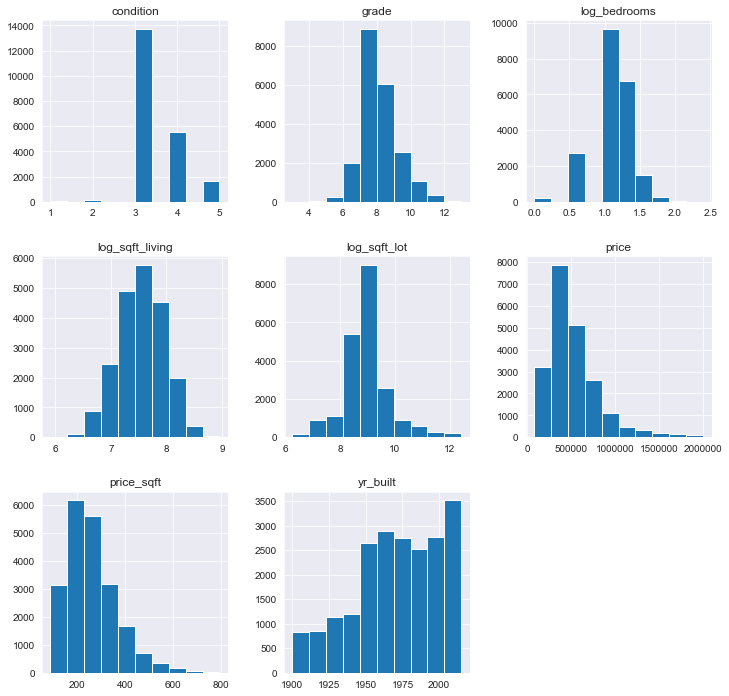

In [60]:
cont_cleaned_df.hist(figsize=(12, 12))
plt.show()

#### Normalize continuous independent variables

Normalizing the continuous data may not be necessary or helpful after log transformations, but I'd like to have it on hand just in case it will improve the model later on.

In [61]:
def norm_feat(series):
    return (series - series.mean())/series.std()

norm_cont_df = log_cont_df.copy(deep=True)
for col in norm_cont_df:  
    norm_cont_df[col] = norm_feat(norm_cont_df[col])
norm_cont_df.describe()

,log_price,log_bedrooms,log_sqft_living,log_sqft_lot,log_condition,log_grade,log_yr_built,log_price_sqft
count,2.111800e+04,2.111800e+04,2.111800e+04,2.111800e+04,2.111800e+04,2.111800e+04,2.111800e+04,2.111800e+04
mean,-2.557119e-16,-4.441313e-17,-2.234115e-16,1.475054e-15,-4.306727e-16,2.277182e-15,-4.522064e-15,-6.190921e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.532274e+00,-4.176101e+00,-3.928641e+00,-3.142604e+00,-6.694790e+00,-6.350459e+00,-2.450250e+00,-2.618223e+00
25%,-7.096490e-01,-2.734045e-01,-6.839849e-01,-5.166509e-01,-6.159900e-01,-5.207365e-01,-6.424103e-01,-7.420402e-01
50%,-2.794052e-02,-2.734045e-01,1.854138e-02,-3.869912e-02,-6.159900e-01,-5.207365e-01,1.419008e-01,1.667973e-02
75%,6.606682e-01,7.485538e-01,6.998566e-01,3.415856e-01,9.758016e-01,3.980089e-01,8.836111e-01,6.835062e-01
max,2.954736e+00,4.342153e+00,3.403959e+00,4.014062e+00,2.210491e+00,3.738482e+00,1.484413e+00,3.056047e+00


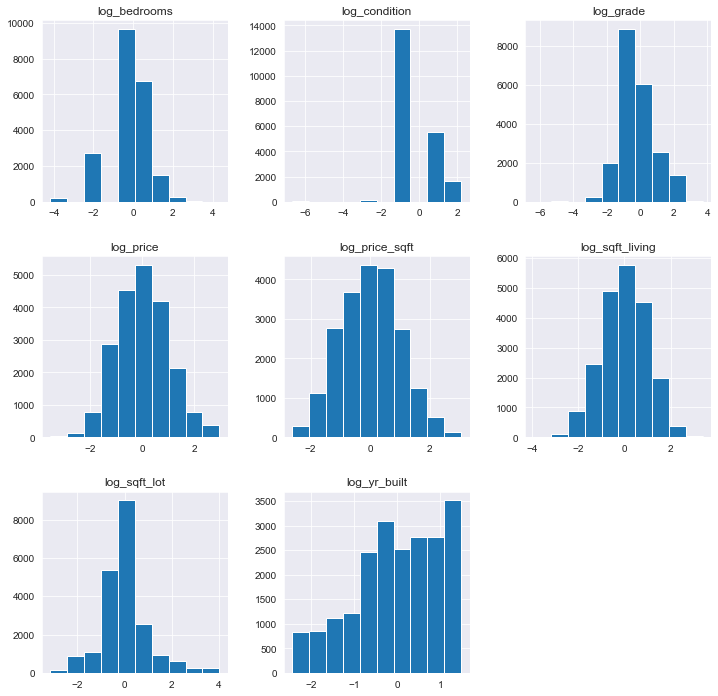

In [62]:
norm_cont_df.hist(figsize=(12,12))
plt.show()

### Categorlical Variables

In [63]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month,price_sqft
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,10,188.050847
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,12,209.338521
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2,233.766234
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,12,308.163265
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,2,303.571429


In [64]:
cat_df = df.copy(deep=True)

In [65]:
#Create new df for categorical variables
cat_df.drop(['bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'yr_built',
            'price_sqft'], axis=1, inplace=True)
cat_df.head()

,price,bathrooms,floors,waterfront,sqft_basement,yr_renovated,zipcode,lat,long,month
0,221900.0,1.00,1.0,0.0,0.0,0.0,98178,47.5112,-122.257,10
1,538000.0,2.25,2.0,0.0,400.0,1991.0,98125,47.7210,-122.319,12
2,180000.0,1.00,1.0,0.0,0.0,0.0,98028,47.7379,-122.233,2
3,604000.0,3.00,1.0,0.0,910.0,0.0,98136,47.5208,-122.393,12
4,510000.0,2.00,1.0,0.0,0.0,0.0,98074,47.6168,-122.045,2


#### Bathrooms

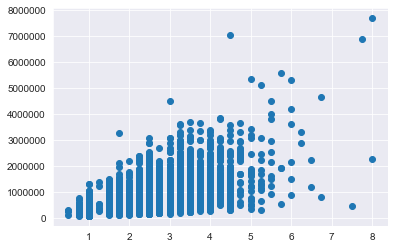

In [66]:
plt.scatter(x = cat_df['bathrooms'], y = cat_df['price'])
plt.show()

In [67]:
#Create bins for bathrooms
bins = [0, 1, 2, 3, 4, 5, 6, 9]
bins_ba = pd.cut(cat_df['bathrooms'], bins)
bins_ba = bins_ba.cat.as_ordered()
bins_ba.head()

0    (0, 1]
1    (2, 3]
2    (0, 1]
3    (2, 3]
4    (1, 2]
Name: bathrooms, dtype: category
Categories (7, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5] < (5, 6] < (6, 9]]

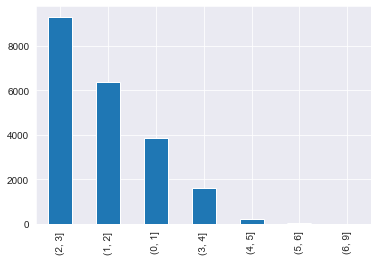

In [68]:
bins_ba.value_counts().plot(kind='bar')

In [69]:
#create new dummy variable columns
cat_df['bathrooms'] = bins_ba
ba_dummies = pd.get_dummies(bins_ba, prefix='ba', drop_first=True)
cat_df = pd.concat([cat_df, ba_dummies], axis=1)
cat_df.head()

,price,bathrooms,floors,waterfront,sqft_basement,yr_renovated,zipcode,lat,long,month,"ba_(1, 2]","ba_(2, 3]","ba_(3, 4]","ba_(4, 5]","ba_(5, 6]","ba_(6, 9]"
0,221900.0,"(0, 1]",1.0,0.0,0.0,0.0,98178,47.5112,-122.257,10,0,0,0,0,0,0
1,538000.0,"(2, 3]",2.0,0.0,400.0,1991.0,98125,47.7210,-122.319,12,0,1,0,0,0,0
2,180000.0,"(0, 1]",1.0,0.0,0.0,0.0,98028,47.7379,-122.233,2,0,0,0,0,0,0
3,604000.0,"(2, 3]",1.0,0.0,910.0,0.0,98136,47.5208,-122.393,12,0,1,0,0,0,0
4,510000.0,"(1, 2]",1.0,0.0,0.0,0.0,98074,47.6168,-122.045,2,1,0,0,0,0,0


In [70]:
cat_df = cat_df.drop(['bathrooms'], axis=1)

#### Floors

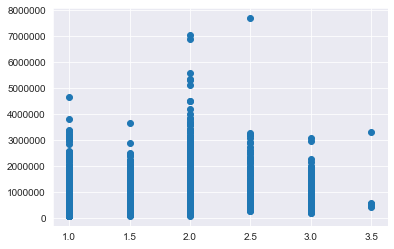

In [71]:
plt.scatter(x = cat_df['floors'], y = cat_df['price'])
plt.show()

In [72]:
bins = [0, 1, 2, 3.5]
bins_fl = pd.cut(cat_df['floors'], bins)
bins_fl = bins_fl.cat.as_ordered()
bins_fl.head()

0    (0.0, 1.0]
1    (1.0, 2.0]
2    (0.0, 1.0]
3    (0.0, 1.0]
4    (0.0, 1.0]
Name: floors, dtype: category
Categories (3, interval[float64]): [(0.0, 1.0] < (1.0, 2.0] < (2.0, 3.5]]

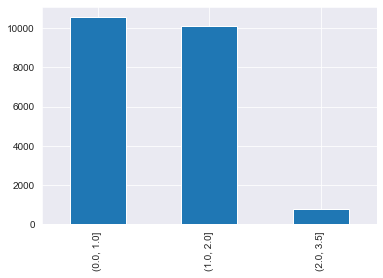

In [73]:
bins_fl.value_counts().plot(kind='bar')

In [74]:
cat_df['floors'] = bins_fl
fl_dummies = pd.get_dummies(bins_fl, prefix='fl', drop_first=True)
cat_df = pd.concat([cat_df, fl_dummies], axis=1)
cat_df.head()

,price,floors,waterfront,sqft_basement,yr_renovated,zipcode,lat,long,month,"ba_(1, 2]","ba_(2, 3]","ba_(3, 4]","ba_(4, 5]","ba_(5, 6]","ba_(6, 9]","fl_(1.0, 2.0]","fl_(2.0, 3.5]"
0,221900.0,"(0.0, 1.0]",0.0,0.0,0.0,98178,47.5112,-122.257,10,0,0,0,0,0,0,0,0
1,538000.0,"(1.0, 2.0]",0.0,400.0,1991.0,98125,47.7210,-122.319,12,0,1,0,0,0,0,1,0
2,180000.0,"(0.0, 1.0]",0.0,0.0,0.0,98028,47.7379,-122.233,2,0,0,0,0,0,0,0,0
3,604000.0,"(0.0, 1.0]",0.0,910.0,0.0,98136,47.5208,-122.393,12,0,1,0,0,0,0,0,0
4,510000.0,"(0.0, 1.0]",0.0,0.0,0.0,98074,47.6168,-122.045,2,1,0,0,0,0,0,0,0


In [75]:
cat_df = cat_df.drop(['floors'], axis=1)

#### Waterfront

In [76]:
cat_df['waterfront'].value_counts(normalize=True)

0.0    0.993184
1.0    0.006816
Name: waterfront, dtype: float64

As over 99% of houses do not have waterfront views, this may not be the best predictor
of home value throughout the region. I'll drop this data from the df.

In [77]:
cat_df.drop(['waterfront'], axis=1, inplace=True)

#### Basement

Change basement into categorical data where 1 equals the house has a basement

In [78]:
cat_df.loc[cat_df['sqft_basement'] > 0, 'sqft_basement'] = 1

In [79]:
cat_df.head()

,price,sqft_basement,yr_renovated,zipcode,lat,long,month,"ba_(1, 2]","ba_(2, 3]","ba_(3, 4]","ba_(4, 5]","ba_(5, 6]","ba_(6, 9]","fl_(1.0, 2.0]","fl_(2.0, 3.5]"
0,221900.0,0.0,0.0,98178,47.5112,-122.257,10,0,0,0,0,0,0,0,0
1,538000.0,1.0,1991.0,98125,47.7210,-122.319,12,0,1,0,0,0,0,1,0
2,180000.0,0.0,0.0,98028,47.7379,-122.233,2,0,0,0,0,0,0,0,0
3,604000.0,1.0,0.0,98136,47.5208,-122.393,12,0,1,0,0,0,0,0,0
4,510000.0,0.0,0.0,98074,47.6168,-122.045,2,1,0,0,0,0,0,0,0


#### Renovated

Change renovations into categorical data where 1 equals the house has been renovated

In [80]:
cat_df.loc[cat_df['yr_renovated'] > 0, 'yr_renovated'] = 1

#### Zipcode

No need to bin zipcode, just create dummy variables for each unique zipcode

In [81]:
zip_dummies = pd.get_dummies(cat_df['zipcode'], prefix='zip', drop_first=True)
cat_df = pd.concat([cat_df, zip_dummies], axis=1)
cat_df.head()

,price,sqft_basement,yr_renovated,zipcode,lat,long,month,"ba_(1, 2]","ba_(2, 3]","ba_(3, 4]",...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,0.0,0.0,98178,47.5112,-122.257,10,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,1.0,1.0,98125,47.7210,-122.319,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,0.0,0.0,98028,47.7379,-122.233,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1.0,0.0,98136,47.5208,-122.393,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0.0,0.0,98074,47.6168,-122.045,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
cat_df.drop(['zipcode'], axis=1, inplace=True)

#### Lat

In [83]:
cat_df.lat.describe()

count    21420.000000
mean        47.560197
std          0.138589
min         47.155900
25%         47.471200
50%         47.572100
75%         47.678100
max         47.777600
Name: lat, dtype: float64

In [84]:
bins = [47, 47.57, 48]
bins_lat = pd.cut(cat_df['lat'], bins)
bins_lat = bins_lat.cat.as_ordered()
bins_lat.head()

0    (47.0, 47.57]
1    (47.57, 48.0]
2    (47.57, 48.0]
3    (47.0, 47.57]
4    (47.57, 48.0]
Name: lat, dtype: category
Categories (2, interval[float64]): [(47.0, 47.57] < (47.57, 48.0]]

In [85]:
cat_df['lat'] = bins_lat
lat_dummies = pd.get_dummies(bins_lat, prefix='lat', drop_first=True)
cat_df = pd.concat([cat_df, lat_dummies], axis=1)
cat_df.head()

,price,sqft_basement,yr_renovated,lat,long,month,"ba_(1, 2]","ba_(2, 3]","ba_(3, 4]","ba_(4, 5]",...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,"lat_(47.57, 48.0]"
0,221900.0,0.0,0.0,"(47.0, 47.57]",-122.257,10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,1.0,1.0,"(47.57, 48.0]",-122.319,12,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,180000.0,0.0,0.0,"(47.57, 48.0]",-122.233,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,1.0,0.0,"(47.0, 47.57]",-122.393,12,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0.0,0.0,"(47.57, 48.0]",-122.045,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
cat_df.drop(['lat'], axis=1, inplace=True)

#### Long

In [87]:
cat_df.long.describe()

count    21420.000000
mean      -122.213784
std          0.140791
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [88]:
bins = [-123, -122.125, -122]
bins_long = pd.cut(cat_df['long'], bins)
bins_long = bins_long.cat.as_ordered()
bins_long.head()

0    (-123.0, -122.125]
1    (-123.0, -122.125]
2    (-123.0, -122.125]
3    (-123.0, -122.125]
4    (-122.125, -122.0]
Name: long, dtype: category
Categories (2, interval[float64]): [(-123.0, -122.125] < (-122.125, -122.0]]

In [89]:
cat_df['long'] = bins_long
long_dummies = pd.get_dummies(bins_long, prefix='long', drop_first=True)
cat_df = pd.concat([cat_df, long_dummies], axis=1)
cat_df.head()

,price,sqft_basement,yr_renovated,long,month,"ba_(1, 2]","ba_(2, 3]","ba_(3, 4]","ba_(4, 5]","ba_(5, 6]",...,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,"lat_(47.57, 48.0]","long_(-122.125, -122.0]"
0,221900.0,0.0,0.0,"(-123.0, -122.125]",10,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,1.0,1.0,"(-123.0, -122.125]",12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,180000.0,0.0,0.0,"(-123.0, -122.125]",2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,604000.0,1.0,0.0,"(-123.0, -122.125]",12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0.0,0.0,"(-122.125, -122.0]",2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [90]:
cat_df.drop(['long'], axis=1, inplace=True)

#### Months to Seasons

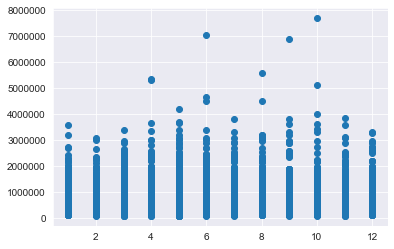

In [91]:
plt.scatter(x = cat_df['month'], y = cat_df['price'])
plt.show()

In [92]:
bins = [0, 3, 6, 9, 12]
bins_month = pd.cut(cat_df['month'], bins)
bins_month = bins_month.cat.as_ordered()
bins_month.head()

0    (9, 12]
1    (9, 12]
2     (0, 3]
3    (9, 12]
4     (0, 3]
Name: month, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

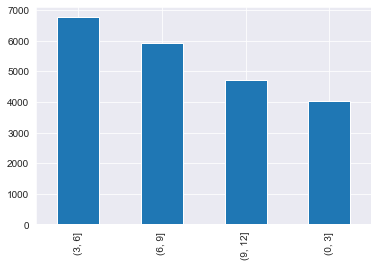

In [93]:
bins_month.value_counts().plot(kind='bar')

In [94]:
cat_df['month'] = bins_month
month_dummies = pd.get_dummies(bins_month, prefix='mo', drop_first=True)
cat_df = pd.concat([cat_df, month_dummies], axis=1)
cat_df.head()

,price,sqft_basement,yr_renovated,month,"ba_(1, 2]","ba_(2, 3]","ba_(3, 4]","ba_(4, 5]","ba_(5, 6]","ba_(6, 9]",...,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,"lat_(47.57, 48.0]","long_(-122.125, -122.0]","mo_(3, 6]","mo_(6, 9]","mo_(9, 12]"
0,221900.0,0.0,0.0,"(9, 12]",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,538000.0,1.0,1.0,"(9, 12]",0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,180000.0,0.0,0.0,"(0, 3]",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,604000.0,1.0,0.0,"(9, 12]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,0.0,0.0,"(0, 3]",1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [95]:
cat_df.drop(['month'], axis=1, inplace=True)

In [96]:
cat_df.head()

,price,sqft_basement,yr_renovated,"ba_(1, 2]","ba_(2, 3]","ba_(3, 4]","ba_(4, 5]","ba_(5, 6]","ba_(6, 9]","fl_(1.0, 2.0]",...,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,"lat_(47.57, 48.0]","long_(-122.125, -122.0]","mo_(3, 6]","mo_(6, 9]","mo_(9, 12]"
0,221900.0,0.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,538000.0,1.0,1.0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,180000.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,604000.0,1.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,0.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


## Model

### Baseline Model

In [97]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 85 columns):
price                      21420 non-null float64
sqft_basement              21420 non-null float64
yr_renovated               21420 non-null float64
ba_(1, 2]                  21420 non-null uint8
ba_(2, 3]                  21420 non-null uint8
ba_(3, 4]                  21420 non-null uint8
ba_(4, 5]                  21420 non-null uint8
ba_(5, 6]                  21420 non-null uint8
ba_(6, 9]                  21420 non-null uint8
fl_(1.0, 2.0]              21420 non-null uint8
fl_(2.0, 3.5]              21420 non-null uint8
zip_98002                  21420 non-null uint8
zip_98003                  21420 non-null uint8
zip_98004                  21420 non-null uint8
zip_98005                  21420 non-null uint8
zip_98006                  21420 non-null uint8
zip_98007                  21420 non-null uint8
zip_98008                  21420 non-null uint8
zip_98010            

In [98]:
cat_df.drop(['price'], axis=1, inplace=True)

In [99]:
cont_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21118 entries, 0 to 21596
Data columns (total 8 columns):
price              21118 non-null float64
condition          21118 non-null int64
grade              21118 non-null int64
yr_built           21118 non-null int64
price_sqft         21118 non-null float64
log_bedrooms       21118 non-null float64
log_sqft_living    21118 non-null float64
log_sqft_lot       21118 non-null float64
dtypes: float64(5), int64(3)
memory usage: 1.5 MB


In [100]:
model1_df = pd.concat([cont_cleaned_df, cat_df], axis=1)

In [101]:
#Drop rows with na values from the final df
model1_df.dropna(axis=0, how='any', inplace=True)
model1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21118 entries, 0 to 21596
Data columns (total 92 columns):
price                      21118 non-null float64
condition                  21118 non-null float64
grade                      21118 non-null float64
yr_built                   21118 non-null float64
price_sqft                 21118 non-null float64
log_bedrooms               21118 non-null float64
log_sqft_living            21118 non-null float64
log_sqft_lot               21118 non-null float64
sqft_basement              21118 non-null float64
yr_renovated               21118 non-null float64
ba_(1, 2]                  21118 non-null uint8
ba_(2, 3]                  21118 non-null uint8
ba_(3, 4]                  21118 non-null uint8
ba_(4, 5]                  21118 non-null uint8
ba_(5, 6]                  21118 non-null uint8
ba_(6, 9]                  21118 non-null uint8
fl_(1.0, 2.0]              21118 non-null uint8
fl_(2.0, 3.5]              21118 non-null uint8
zip_980

In [129]:
#Drop price per squarefoot before modeling to eliminate multicollinearity with independent and dependent variables
model1_df.drop(['price_sqft'], axis=1, inplace=True)

In [130]:
#import necessary library to run linear regression using statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

predictors = model1_df.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(model1_df.price, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     953.4
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:09:11   Log-Likelihood:            -2.7822e+05
No. Observations:               21118   AIC:                         5.566e+05
Df Residuals:                   21027   BIC:                         5.573e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -1.14e+06   1.14e+05     -9.973      0.000   -1.36e+06   -9.16e+05
condition                2.743e+04   1553.364     17.658      0.000    2.44e+04    3.05e+04
grade                    8.208e+04   1380.888     59.437      0.000    7.94e+04    8.48e+04
yr_built                 -666.5627     53.008    -12.575      0.000    -770.462    -562.663
log_bedrooms            -5.733e+04   4312.246    -13.294      0.000   -6.58e+04   -4.89e+04
log_sqft_living          2.453e+05   4868.333     50.394      0.000    2.36e+05    2.55e+05
log_sqft_lot             3.408e+04   1552.498     21.952      0.000     3.1e+04    3.71e+04
sqft_basement           -1.984e+04   2346.490     -8.454      0.000   -2.44e+04   -1.52e+04
yr_renovated             5.277e+04   5161.166     10.224      0.000    4.26e+04    6.29e+04
ba_(1, 2]               -3.811e+04   3130.457    -12.174      0.000   -4.42e+04    -3.2e+04
ba_(2, 3]               -2.015e+04   4034.345     -4.995      0.000   -2.81e+04   -1.22e+04
ba_(3, 4]                9.235e+04   5918.913     15.603      0.000    8.08e+04    1.04e+05
ba_(4, 5]                1.808e+05   1.13e+04     15.982      0.000    1.59e+05    2.03e+05
ba_(5, 6]                1.628e+05   3.36e+04      4.846      0.000    9.69e+04    2.29e+05
ba_(6, 9]               -1.291e+05   7.42e+04     -1.741      0.082   -2.74e+05    1.62e+04
fl_(1.0, 2.0]            2038.7218   2547.358      0.800      0.424   -2954.296    7031.740
fl_(2.0, 3.5]           -4048.6437   5925.527     -0.683      0.494   -1.57e+04    7565.845
zip_98002                2.701e+04   1.14e+04      2.372      0.018    4692.522    4.93e+04
zip_98003               -8988.1533   1.03e+04     -0.877      0.381   -2.91e+04    1.11e+04
zip_98004                6.929e+05   1.25e+04     55.437      0.000    6.68e+05    7.17e+05
zip_98005                3.271e+05    1.4e+04     23.397      0.000       3e+05    3.54e+05
zip_98006                 2.95e+05   9201.398     32.063      0.000    2.77e+05    3.13e+05
zip_98007                  2.5e+05   1.46e+04     17.109      0.000    2.21e+05    2.79e+05
zip_98008                2.625e+05    1.3e+04     20.156      0.000    2.37e+05    2.88e+05
zip_98010                5.888e+04    1.5e+04      3.937      0.000    2.96e+04    8.82e+04
zip_98011                1.459e+05   1.34e+04     10.878      0.000     1.2e+05    1.72e+05
zip_98014                1.054e+05   1.55e+04      6.782      0.000    7.49e+04    1.36e+05
zip_98019                9.664e+04   1.36e+04      7.106      0.000       7e+04    1.23e+05
zip_98022               -1546.2321   1.13e+04     -0.137      0.891   -2.36e+04    2.05e+04
zip_98023               -2.438e+04   8898.949     -2.740      0.006   -4.18e+04   -6939.173
zip_98024                1.426e+05   1.65e+04  

Right away, the baseline model has an adjusted R-squared value of 0.802. This means that the model explains 80.2% of the variability in the response data around its mean. This seems too high for a baseline model. It could indicate the model is too complex and overfitting could be an issue. This can be checked through a test-train split to assess test data against the trained model.

High p-values:
- sqft_basement
- fl_(1.0, 2.0]
- fl_(2.0, 3.5]
- ba_(6, 9]
- lat_(47.57, 48.0]
- mo_(3, 6]
- A handful of zipcodes

These can be dropped in the subsequent model to see if the r-squared value will improve



##### Baseline Model Test-Train Split

In [131]:
#split the data into a train model and test model
from sklearn.model_selection import train_test_split

y = model1_df[['price']]
X = model1_df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

16894 4224 16894 4224


In [132]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

In [133]:
train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

In [134]:
#check mse values between train and test models to determine over/underfit model
mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: price    1.587484e+10
dtype: float64
Test MSE: price    1.785984e+10
dtype: float64


In [135]:
print(mse_train/mse_test)

price    0.888857
dtype: float64


The test-train split indicates an error of around 11%. This means that the initial model shouldnt be overfit since the test and train values are relatively close.

### Model 2

In [136]:
model2_df = model1_df.copy(deep=True)

In [138]:
#Drop high p-value variables and run the model again
model2_df.drop(['sqft_basement', 'fl_(1.0, 2.0]', 'fl_(2.0, 3.5]', 'ba_(6, 9]',
                 'lat_(47.57, 48.0]', 'mo_(3, 6]'], axis=1, inplace=True)


In [139]:
predictors = model2_df.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(model2_df.price, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1016.
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:16:37   Log-Likelihood:            -2.7827e+05
No. Observations:               21118   AIC:                         5.567e+05
Df Residuals:                   21033   BIC:                         5.574e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.105e+06   1.13e+05     -9.780      0.000   -1.33e+06   -8.84e+05
condition                2.642e+04   1549.026     17.059      0.000    2.34e+04    2.95e+04
grade                    8.462e+04   1356.709     62.372      0.000     8.2e+04    8.73e+04
yr_built                 -652.3390     52.108    -12.519      0.000    -754.475    -550.203
log_bedrooms            -5.524e+04   4313.177    -12.808      0.000   -6.37e+04   -4.68e+04
log_sqft_living           2.34e+05   4588.121     51.003      0.000    2.25e+05    2.43e+05
log_sqft_lot             3.422e+04   1499.742     22.817      0.000    3.13e+04    3.72e+04
yr_renovated             5.375e+04   5167.951     10.400      0.000    4.36e+04    6.39e+04
ba_(1, 2]               -4.179e+04   3102.563    -13.471      0.000   -4.79e+04   -3.57e+04
ba_(2, 3]               -2.236e+04   3949.432     -5.662      0.000   -3.01e+04   -1.46e+04
ba_(3, 4]                8.775e+04   5804.784     15.117      0.000    7.64e+04    9.91e+04
ba_(4, 5]                1.773e+05   1.13e+04     15.730      0.000    1.55e+05    1.99e+05
ba_(5, 6]                1.582e+05   3.36e+04      4.703      0.000    9.23e+04    2.24e+05
zip_98002                 2.89e+04   1.14e+04      2.533      0.011    6534.888    5.13e+04
zip_98003               -1.171e+04   1.03e+04     -1.140      0.254   -3.18e+04    8418.591
zip_98004                6.812e+05   1.03e+04     65.935      0.000    6.61e+05    7.01e+05
zip_98005                3.144e+05   1.21e+04     26.043      0.000    2.91e+05    3.38e+05
zip_98006                2.891e+05   9140.687     31.623      0.000    2.71e+05    3.07e+05
zip_98007                2.402e+05   1.29e+04     18.688      0.000    2.15e+05    2.65e+05
zip_98008                  2.5e+05   1.09e+04     22.900      0.000    2.29e+05    2.71e+05
zip_98010                6.075e+04    1.5e+04      4.055      0.000    3.14e+04    9.01e+04
zip_98011                1.357e+05   1.14e+04     11.869      0.000    1.13e+05    1.58e+05
zip_98014                9.902e+04   1.39e+04      7.140      0.000    7.18e+04    1.26e+05
zip_98019                9.069e+04   1.16e+04      7.790      0.000    6.79e+04    1.14e+05
zip_98022                 751.9908   1.13e+04      0.067      0.947   -2.14e+04    2.29e+04
zip_98023                -2.78e+04   8908.586     -3.120      0.002   -4.53e+04   -1.03e+04
zip_98024                 1.43e+05   1.66e+04      8.636      0.000    1.11e+05    1.75e+05
zip_98027                1.569e+05   9979.725     15.723      0.000    1.37e+05    1.76e+05
zip_98028                1.291e+05   1.02e+04     12.647      0.000    1.09e+05    1.49e+05
zip_98029                2.095e+05   1.03e+04     20.429      0.000    1.89e+05     2.3e+05
zip_98030                5944.0730   1.05e+04  

Dropping high p-value variables didn't have much affect on the r-squared value of the initial model

##### Model 2 Test-Train Split

In [140]:
y = model2_df[['price']]
X = model2_df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

16894 4224 16894 4224


In [141]:
train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

In [142]:
mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: price    1.491434e+11
dtype: float64
Test MSE: price    1.505147e+11
dtype: float64


r squared value decreased, however the mse's of train and test are nearly identical

In [143]:
print(mse_train/mse_test)

price    0.990889
dtype: float64


Though dropping the high p-value variables didn't have much of an affect on the r-squared value, the mse values between the test and train models improved significantly to where they're nearly identical. This seems like a good model.

### Stepwise Regression

Use model 2 for stepwise regression to see if any improvements can be made. This regression goes through an iterative process where the lowest p-value variables are added to a model, and high p-value variables are rejected.

In [144]:
import statsmodels.api as sm

predictors = model2_df.drop('price', axis=1)

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [145]:
results = stepwise_selection(predictors, model2_df.price, verbose=True)
print('resulting features:')
print(results)

Add  zip_98004                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  log_sqft_living                with p-value 0.0
Add  ba_(3, 4]                      with p-value 7.25546e-178
Add  zip_98040                      with p-value 4.97834e-174
Add  zip_98023                      with p-value 2.04581e-133
Add  zip_98112                      with p-value 2.52799e-116
Add  zip_98033                      with p-value 2.11935e-118
Add  zip_98039                      with p-value 4.49028e-119
Add  zip_98092                      with p-value 4.10616e-80
Add  zip_98003                      with p-value 1.33267e-73
Add  zip_98042                      with p-value 3.86778e-74
Add  zip_98058                      with p-value 4.72207e-72
Add  zip_98105                      with p-value 6.95662e-70
Add  zip_98199                      with p-value 3.75532e-71
Add  ba_(4, 5]                      with p-value 7

In [146]:
len(results)

76

The stepwise regression model dropped 8 unwanted variables with high p-values

In [147]:
predictors_fin = model2_df[results]

predictors_int = sm.add_constant(predictors_fin)
model = sm.OLS(model2_df.price, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1121.
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:30:13   Log-Likelihood:            -2.7829e+05
No. Observations:               21118   AIC:                         5.567e+05
Df Residuals:                   21041   BIC:                         5.573e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.044e+06   1.12e+05     -9.337      0.000   -1.26e+06   -8.25e+05
zip_98004                 6.51e+05   8267.889     78.734      0.000    6.35e+05    6.67e+05
grade                    8.464e+04   1355.247     62.454      0.000     8.2e+04    8.73e+04
yr_built                 -666.6494     51.786    -12.873      0.000    -768.153    -565.146
log_sqft_living           2.34e+05   4589.234     50.998      0.000    2.25e+05    2.43e+05
ba_(3, 4]                8.856e+04   5804.965     15.256      0.000    7.72e+04    9.99e+04
zip_98040                4.807e+05   8570.128     56.090      0.000    4.64e+05    4.98e+05
zip_98023               -5.787e+04   6430.650     -9.000      0.000   -7.05e+04   -4.53e+04
zip_98112                5.039e+05   9171.230     54.947      0.000    4.86e+05    5.22e+05
zip_98033                3.298e+05   6892.978     47.844      0.000    3.16e+05    3.43e+05
zip_98039                8.944e+05   2.45e+04     36.575      0.000    8.46e+05    9.42e+05
zip_98092               -6.294e+04   7406.964     -8.498      0.000   -7.75e+04   -4.84e+04
zip_98003               -4.183e+04   8214.992     -5.092      0.000   -5.79e+04   -2.57e+04
zip_98042               -2.867e+04   6186.287     -4.635      0.000   -4.08e+04   -1.65e+04
zip_98105                4.238e+05   9428.395     44.950      0.000    4.05e+05    4.42e+05
zip_98199                3.626e+05   8063.226     44.967      0.000    3.47e+05    3.78e+05
ba_(4, 5]                1.783e+05   1.13e+04     15.820      0.000    1.56e+05       2e+05
zip_98115                2.997e+05   6324.795     47.378      0.000    2.87e+05    3.12e+05
zip_98119                4.186e+05   1.04e+04     40.076      0.000    3.98e+05    4.39e+05
zip_98103                    3e+05   6403.447     46.845      0.000    2.87e+05    3.13e+05
zip_98006                2.585e+05   6594.801     39.198      0.000    2.46e+05    2.71e+05
zip_98117                2.864e+05   6491.616     44.117      0.000    2.74e+05    2.99e+05
zip_98109                4.526e+05   1.31e+04     34.661      0.000    4.27e+05    4.78e+05
log_bedrooms            -5.593e+04   4312.655    -12.969      0.000   -6.44e+04   -4.75e+04
zip_98030               -2.404e+04   8538.160     -2.816      0.005   -4.08e+04   -7308.866
long_(-122.125, -122.0]  1.471e+04   3468.571      4.242      0.000    7915.285    2.15e+04
zip_98116                2.833e+05   7873.197     35.980      0.000    2.68e+05    2.99e+05
zip_98005                2.843e+05   1.04e+04     27.392      0.000    2.64e+05    3.05e+05
zip_98102                4.124e+05   1.35e+04     30.478      0.000    3.86e+05    4.39e+05
zip_98107                2.993e+05   8723.120     34.307      0.000    2.82e+05    3.16e+05
zip_98122                3.043e+05   8506.357  

Again, there hasn't been much improvement on r-squared over three models. It seems life model 2 or 3 will be just fine for home price predictions.

### K-fold Cross Validation

In [162]:
from sklearn.model_selection import cross_val_score

y = model2_df[['price']]
X = model2_df.drop(['price'], axis=1)

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-16603043346.32338
-16563135098.862116
-16518381086.607416


## Interperet

In [149]:
predictors = model2_df.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(model1_df.price, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1016.
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:02:47   Log-Likelihood:            -2.7827e+05
No. Observations:               21118   AIC:                         5.567e+05
Df Residuals:                   21033   BIC:                         5.574e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.105e+06   1.13e+05     -9.780      0.000   -1.33e+06   -8.84e+05
condition                2.642e+04   1549.026     17.059      0.000    2.34e+04    2.95e+04
grade                    8.462e+04   1356.709     62.372      0.000     8.2e+04    8.73e+04
yr_built                 -652.3390     52.108    -12.519      0.000    -754.475    -550.203
log_bedrooms            -5.524e+04   4313.177    -12.808      0.000   -6.37e+04   -4.68e+04
log_sqft_living           2.34e+05   4588.121     51.003      0.000    2.25e+05    2.43e+05
log_sqft_lot             3.422e+04   1499.742     22.817      0.000    3.13e+04    3.72e+04
yr_renovated             5.375e+04   5167.951     10.400      0.000    4.36e+04    6.39e+04
ba_(1, 2]               -4.179e+04   3102.563    -13.471      0.000   -4.79e+04   -3.57e+04
ba_(2, 3]               -2.236e+04   3949.432     -5.662      0.000   -3.01e+04   -1.46e+04
ba_(3, 4]                8.775e+04   5804.784     15.117      0.000    7.64e+04    9.91e+04
ba_(4, 5]                1.773e+05   1.13e+04     15.730      0.000    1.55e+05    1.99e+05
ba_(5, 6]                1.582e+05   3.36e+04      4.703      0.000    9.23e+04    2.24e+05
zip_98002                 2.89e+04   1.14e+04      2.533      0.011    6534.888    5.13e+04
zip_98003               -1.171e+04   1.03e+04     -1.140      0.254   -3.18e+04    8418.591
zip_98004                6.812e+05   1.03e+04     65.935      0.000    6.61e+05    7.01e+05
zip_98005                3.144e+05   1.21e+04     26.043      0.000    2.91e+05    3.38e+05
zip_98006                2.891e+05   9140.687     31.623      0.000    2.71e+05    3.07e+05
zip_98007                2.402e+05   1.29e+04     18.688      0.000    2.15e+05    2.65e+05
zip_98008                  2.5e+05   1.09e+04     22.900      0.000    2.29e+05    2.71e+05
zip_98010                6.075e+04    1.5e+04      4.055      0.000    3.14e+04    9.01e+04
zip_98011                1.357e+05   1.14e+04     11.869      0.000    1.13e+05    1.58e+05
zip_98014                9.902e+04   1.39e+04      7.140      0.000    7.18e+04    1.26e+05
zip_98019                9.069e+04   1.16e+04      7.790      0.000    6.79e+04    1.14e+05
zip_98022                 751.9908   1.13e+04      0.067      0.947   -2.14e+04    2.29e+04
zip_98023                -2.78e+04   8908.586     -3.120      0.002   -4.53e+04   -1.03e+04
zip_98024                 1.43e+05   1.66e+04      8.636      0.000    1.11e+05    1.75e+05
zip_98027                1.569e+05   9979.725     15.723      0.000    1.37e+05    1.76e+05
zip_98028                1.291e+05   1.02e+04     12.647      0.000    1.09e+05    1.49e+05
zip_98029                2.095e+05   1.03e+04     20.429      0.000    1.89e+05     2.3e+05
zip_98030                5944.0730   1.05e+04  

In [150]:
predict_df = model2_df.copy(deep=True)

In [151]:
predict_df['predictions'] = model.predict()

predict_df['diff'] = predict_df['predictions'] - predict_df['price']

predict_df['diff'].describe()

count    2.111800e+04
mean     1.509148e-07
std      1.277802e+05
min     -1.333452e+06
25%     -5.354264e+04
50%      7.015681e+03
75%      6.800480e+04
max      7.039453e+05
Name: diff, dtype: float64

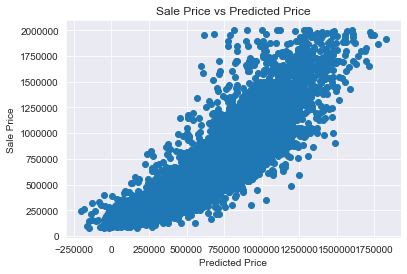

In [185]:
plt.scatter(x=predict_df['predictions'], y=predict_df['price'])
plt.title('Sale Price vs Predicted Price')
plt.xlabel('Predicted Price')
plt.ylabel('Sale Price')
plt.show()

In [184]:
under = predict_df[predict_df['diff'] < -100000]
over = predict_df[predict_df['diff'] > 100000]

print(f'The model underestimates {round(len(under)/len(predict_df)*100, 2)}% of houses by over 100000')
print(f'The model overestimates {round(len(over)/len(predict_df)*100, 2)}% of houses by over 100000')

The model underestimates 13.09% of houses by over 100000
The model overestimates 16.1% of houses by over 100000


### Questions
- Is there an ideal location for investing? Low cost per squarefoot, room for improvements
- Is there an ideal month to purchase a home for investing? Cheaper months to buy
- What is the average home price of renovated vs unrenovated homes?

#### Ideal Investing Location

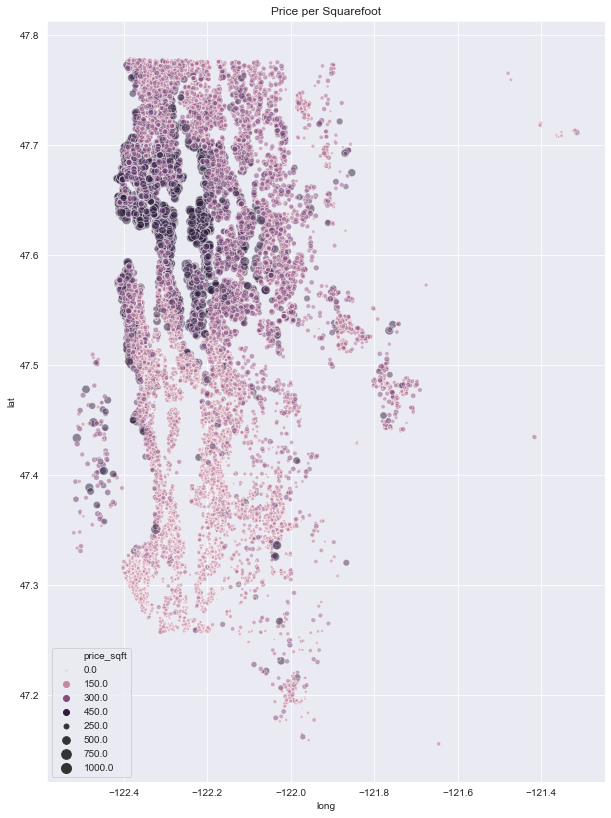

In [165]:
plt.figure(figsize=(10, 14))
sns.scatterplot(x='long', y='lat', hue='price_sqft', size='price_sqft',
                sizes = (2, 100), hue_norm=(0, 450), alpha=.5,  data=df)
plt.title('Price per Squarefoot')
plt.legend(fancybox=True)
plt.show()

The most expensive homes in terms of price per squarefoot are clustered close to Seattle's city center. Whereas the least expensive homes are south of the city, with a small cluster located north of the city
<br>

<br>

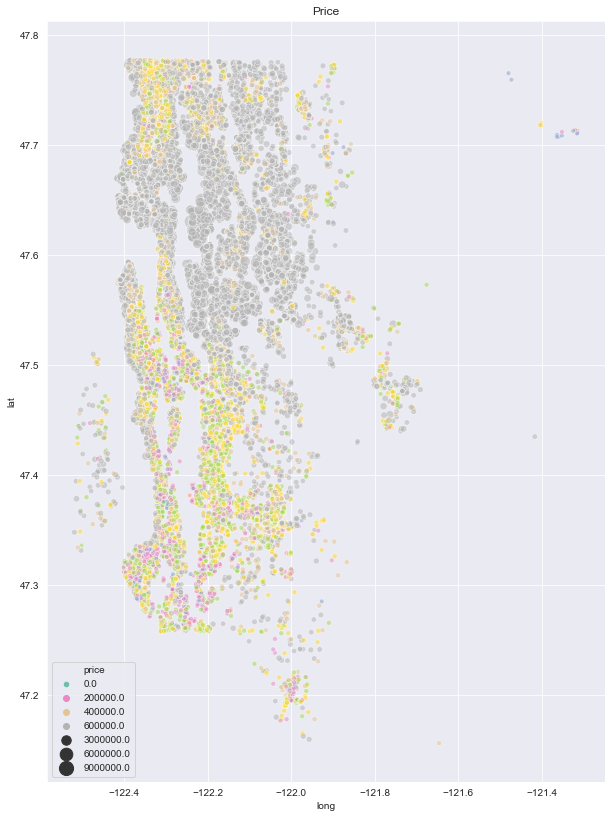

In [180]:
plt.figure(figsize=(10, 14))
sns.scatterplot(x='long', y='lat', hue='price', size='price',
                sizes = (20, 200), hue_norm=(0, 500000), alpha=.5,  data=df, palette="Set2")
plt.title('Price')
plt.legend(fancybox=True)
plt.show()

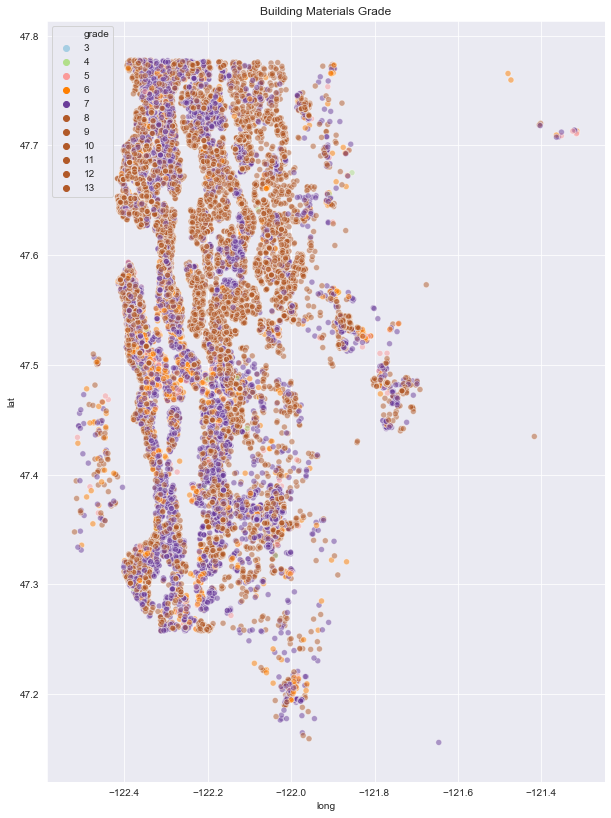

In [167]:
plt.figure(figsize=(10, 14))
sns.scatterplot(x='long', y='lat', hue='grade',
                sizes = (2, 100), hue_norm=(3, 8), alpha=.5,  data=df, palette = "Paired",
                legend = 'full')
plt.title('Building Materials Grade')
plt.legend(fancybox=True)
plt.show()

Building quality materials tend to track well with price per square foot. Again, south of the city, and north of the city

<br>

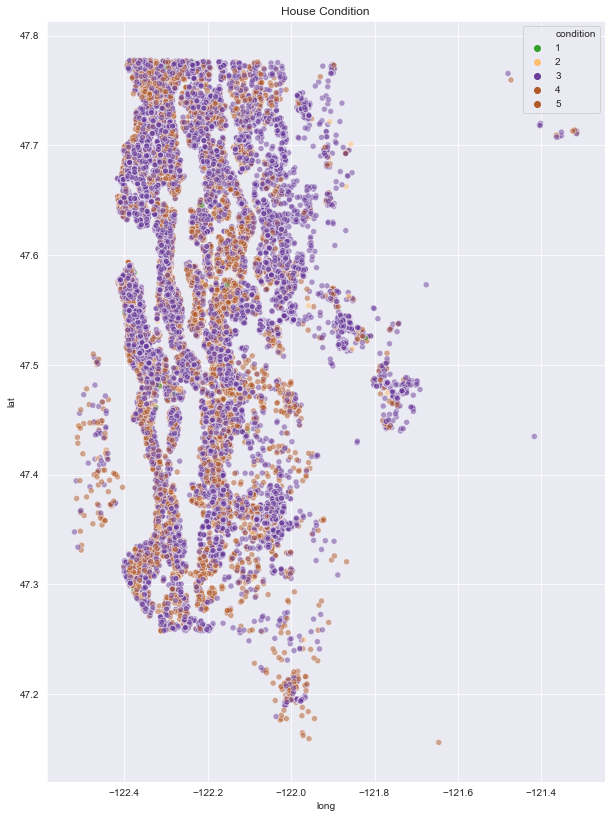

In [168]:
plt.figure(figsize=(10, 14))
sns.scatterplot(x='long', y='lat', hue='condition',
                sizes = (2, 100), hue_norm=(0, 4), alpha=.5,  data=df, palette = "Paired",
                legend = 'full')
plt.title('House Condition')
plt.legend(fancybox=True)
plt.show()

The majority of homes seem to have an average condition rating at 3. For investing purposes this is important to note for value added if renovations do take place

<br>

#### Month to Purchase/Sell House

In [170]:
price_month = df.groupby(['month'])['price'].mean()
price_month

month
1     527074.020833
2     508465.331148
3     544333.370572
4     564607.204390
5     551178.627606
6     557534.318182
7     544892.161013
8     536130.917872
9     529705.847458
10    540017.008556
11    523185.227695
12    525126.310867
Name: price, dtype: float64

In [171]:
price_month = df.groupby(['month'])['price'].mean()

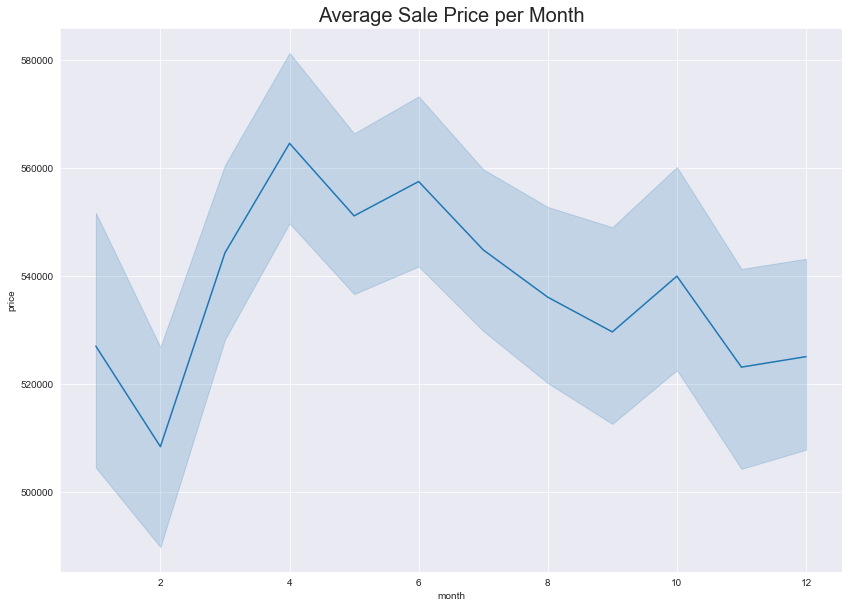

In [172]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='month', y='price', data=df)
plt.title('Average Sale Price per Month', fontsize=20)
plt.show()

The best time to sell a home is April through June, whereas the best time to purchase a home falls between November and February

<br>

In [173]:
price_sqft_month = df.groupby(['month'])['price_sqft'].mean()
price_sqft_month

month
1     255.985078
2     259.479325
3     273.254454
4     278.851129
5     268.573015
6     264.809163
7     259.691581
8     259.868064
9     259.332240
10    262.525045
11    258.640834
12    254.415778
Name: price_sqft, dtype: float64

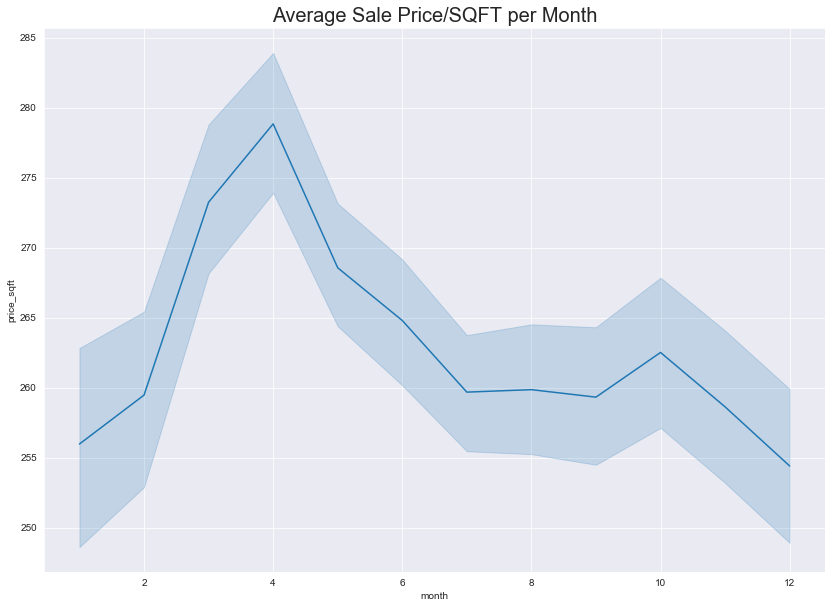

In [174]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='month', y='price_sqft', data=df)
plt.title('Average Sale Price/SQFT per Month', fontsize=20)
plt.show()

#### House Renovation

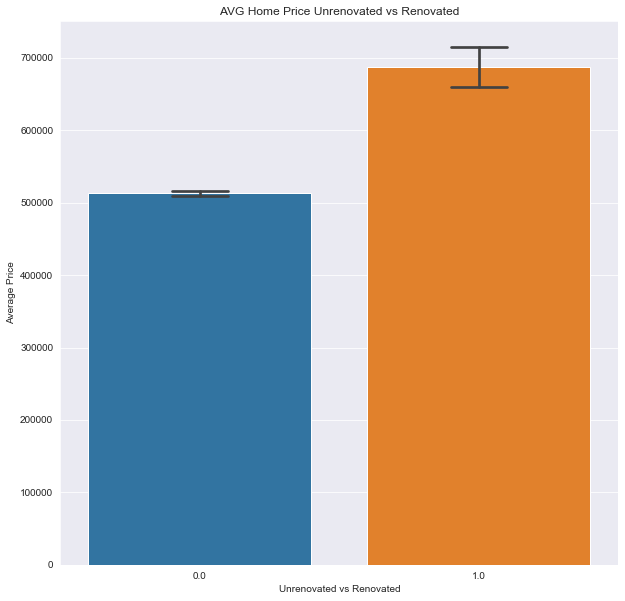

In [181]:
plt.figure(figsize=(10, 10))
sns.barplot(x='yr_renovated', y='price', data=model1_df, capsize=0.2)
plt.title("AVG Home Price Unrenovated vs Renovated")
plt.xlabel('Unrenovated vs Renovated')
plt.ylabel('Average Price')
plt.show()

Comparing unrenovated homes to renovated homes shows a clear increase in price by over $150000. 

<br>

## Conclusion

The dataset of home sale prices in the King County area provided enough variable information to perform linear regression models that yielded approximately 80% predictive accuracy. The model was constrained to houses valued below 2 million, with lot sizes under 250,000 square feet. Even with these contraints, the models predictive capabilities deviated with higher home prices. The deviation really becomes apparent at around $1.25 million.

The most signifiant coefficient is zipcode with a range between -62900 and 894000, the second most significant postive coefficient is square feet of a home at 234000, and the most negative coefficient is bedrooms. The positive coefficients indicate the weight of influence the independent variables have on the mean of the dependent variable to increase; there is the opposite effect for negative coefficients on the dependent variable.

Questions:
1. Is there an ideal location for investing? -- Taking into account price per square foot, home condition, and building materials, the two best areas to invest in are south of Seattles city center, and a small pocket north of the city. These areas provide a below average price per square foot along with average conditions and building materials ideal for renovations before renting.
2. When is the best time to buy/sell a home? -- Purchasing a home for investment purchases should be in the winter months between November and February, whereas selling an investment property should be done between April and June for a higher return on investment.
3. Is there a signifant differnce in home price between unrenovated and renovated home? -- The data shows that renovating a home can potentially increase its value by over $150,000

Recommendation:

The initial steps in creating a predictive home price model provided 80% accuracy, but there is always room for imporovement. Taking more data into account can help increase the models predictive capabilities. Adding more variables such as population density, crime rate, school rating, proximity to ammenities, and proximity to industrial areas would definitely help in doing so. 

As home prices increased, the model became less accurate, so somehow refining the model based on price-points of interest could also help tighten the model for accuracy.